In [12]:
import os
import pickle as pkl
from scipy.misc import imread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("white")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
with open("../Data/cifar10/data_batch_1", "rb") as f:
    cifar_train = pkl.load(f)["data"]
    
with open("../Data/cifar10/test_batch", "rb") as f:
    cifar_test = pkl.load(f)["data"]
    
print cifar_train.shape
print cifar_test.shape

(10000, 3072)
(10000, 3072)


In [15]:
ss_train = StandardScaler()
ss_test  = StandardScaler()

cifar_train = ss_train.fit_transform(cifar_train)
cifar_test  = ss_test.fit_transform(cifar_test)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
pca = PCA(n_components=256)

pca.fit(np.concatenate((
    cifar_train,
    cifar_test,
), axis=0))

cifar_trn_pca = pca.transform(cifar_train)
cifar_tst_pca = pca.transform(cifar_test)

In [17]:
tsne = TSNE()

cifar_trn_tsne = tsne.fit_transform(cifar_trn_pca)
cifar_tst_tsne = tsne.fit_transform(cifar_tst_pca)

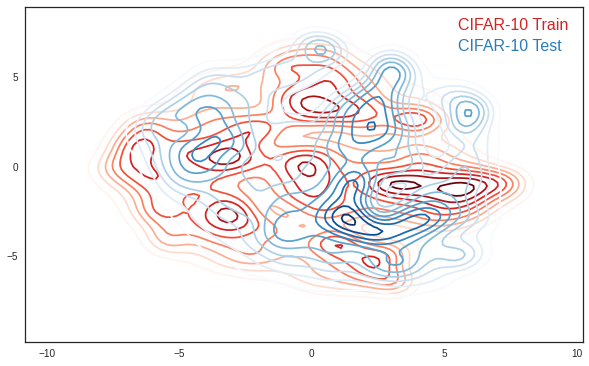

In [18]:
plt.rcParams['figure.figsize'] = (10, 6)

ax = sns.kdeplot(
    data=cifar_trn_tsne[:,0],
    data2=cifar_trn_tsne[:,1],
    cmap="Reds",
    shade=False,
    shade_lowest=False
)
ax = sns.kdeplot(
    data=cifar_tst_tsne[:,0],
    data2=cifar_tst_tsne[:,1],
    cmap="Blues",
    shade=False,
    shade_lowest=False
)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(5.5, 6.5, "CIFAR-10 Test", size=16, color=blue)
ax.text(5.5, 7.7, "CIFAR-10 Train", size=16, color=red)

In [2]:
PATH = "../Data/top_down_view/{0}.pkl"

with open(PATH.format("train"), "rb") as f:
    train_crops = pkl.load(f)[1]
    
with open(PATH.format("test"), "rb") as f:
    test_crops = pkl.load(f)[1]

In [3]:
train_crops = np.reshape(train_crops, newshape=(train_crops.shape[0], -1))
test_crops  = np.reshape(test_crops, newshape=(test_crops.shape[0], -1))

print train_crops.shape
print test_crops.shape

(16307, 14400)
(4808, 14400)


In [4]:
ss2_train = StandardScaler()
ss2_test  = StandardScaler()

train_crops = ss2_train.fit_transform(train_crops)
test_crops =  ss2_test.fit_transform(test_crops)

In [5]:
pca2 = PCA(n_components=256)

pca2.fit(np.concatenate((
    train_crops,
    test_crops,
), axis=0))

top_down_trn_pca = pca2.transform(train_crops)
top_down_tst_pca = pca2.transform(test_crops)

In [6]:
tsne2 = TSNE()

top_down_trn_tsne = tsne2.fit_transform(top_down_trn_pca)
top_down_tst_tsne = tsne2.fit_transform(top_down_tst_pca)

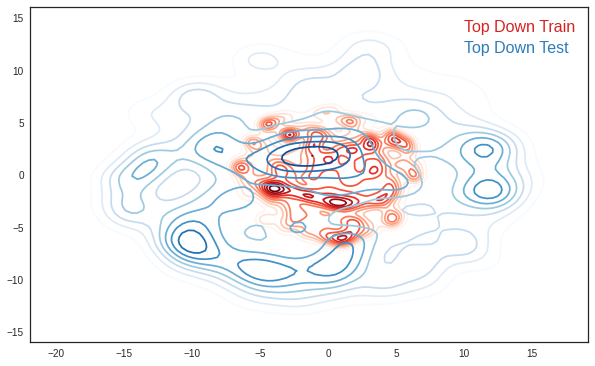

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)

ax = sns.kdeplot(
    data=top_down_trn_tsne[:,0],
    data2=top_down_trn_tsne[:,1],
    cmap="Reds",
    shade=False,
    shade_lowest=False
)
ax = sns.kdeplot(
    data=top_down_tst_tsne[:,0],
    data2=top_down_tst_tsne[:,1],
    cmap="Blues",
    shade=False,
    shade_lowest=False
)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(10, 11.8, "Top Down Test", size=16, color=blue)
ax.text(10, 13.8, "Top Down Train", size=16, color=red)